<a href="https://colab.research.google.com/github/reedmarohn/lab-1-phase-2-reedmarohn/blob/main/DATA_301_Lab_1B_Reed_Marohn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore the In Class Survey

During the first class, you filled out the [first-day survey](https://docs.google.com/forms/d/e/1FAIpQLSczqKwzkye0RP8byLMxzj1Br3kC_YUdVGLWmMXX6VND99ivWg/viewform). In this lab, you will explore [the responses](https://docs.google.com/spreadsheets/d/1K9rfAscLESbwvovOc1aD3K6PFgdqkVRbaFHeD-UMTSc/edit?usp=sharing).

Download the spreadsheet from the link above, then read the data into a `pandas` `DataFrame` whose columns are the survey questions. Each row represents one student's response to the questions.

## Question 1

Make a graphic that visualizes the favorite colors of students in DATA 301. Explain what you see.

(_Hint:_ You might have to clean the data a bit first.)

In [3]:
from google.colab import files
uploaded = files.upload()

Saving data301responses.csv to data301responses.csv


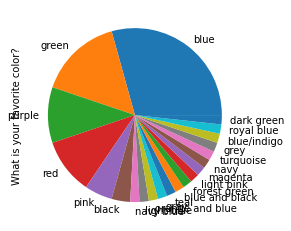

In [11]:
import pandas as pd
import io
df_responses = pd.read_csv(io.BytesIO(uploaded['data301responses.csv']))
df_responses["What is your favorite color?"].str.lower().value_counts(normalize=True).plot.pie()

Large majorty of students have blue as their favorite color, followed up by green, and then a near tie of purple and red.

## Question 2

Is there a relationship between the number of siblings a student has, and whether or not they live in SLO?

Make a visualization to address this question, and discuss the result.

How many siblings do you have?,0,1,2,3,5
living,,,,,
in SLO,0.03125,0.50,0.40625,0.0625,0.00
outside SLO,0.16000,0.36,0.28000,0.1200,0.08


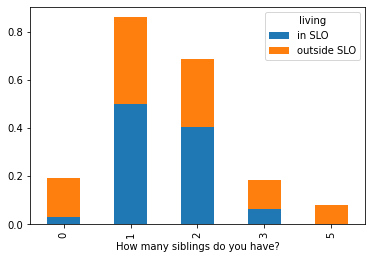

In [16]:
df_responses["living"] = df_responses["Where are you living this quarter?"].map({
    "Off Campus, but in SLO": "in SLO",
    "Off Campus, outside of SLO": "outside SLO",
    "On-Campus housing": "in SLO"
})
df_responses["living"].value_counts()
joint_siblings_living = pd.crosstab(df_responses["living"], df_responses["How many siblings do you have?"], normalize=True)

givenLiving = joint_siblings_living.sum(axis = 1)
cond_siblings_living = joint_siblings_living.divide(givenLiving, axis = 0)
cond_siblings_living.T.plot.bar(stacked=True)
cond_siblings_living


Given you live in SLO, you have a large chance to have 1 or 2 siblings. if you live outside of SLO, you are more likely than students living in SLO to have 3 siblings or have no siblngs.

## Question 3

You were asked to guess how many golf balls fit into a standard-sized school bus.  This is actually a famous Google interview question!  The best answer I could find online is [here](https://www.quora.com/How-many-golf-balls-can-fit-into-a-school-bus).

How did the different subgroups in the class do on this question?  That is, can you find an interesting relationship between the golf ball numbers guess and any of the other variables in this dataset?

(_Hint:_ There are many reasonable approaches to this problem. You will get full credit for any reasonable approach, as long as you carefully justify it.)

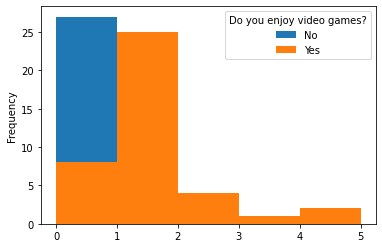

In [18]:
#got errors when trying to use column name for the golf ball section so used iloc instead to reference column
df_responses["golfball"] = df_responses.iloc[:, [5]]
joint_golfball_videogames = pd.crosstab(df_responses["golfball"], df_responses["Do you enjoy video games?"])
joint_golfball_videogames.plot.hist(bins=5);

All of the students who responded "no" to enjoying videogames chose a smaller number of golf balls to fit in the school bus than almost half of the respondents who voted "yes" to enjoying videogames.

## Question 4

What are the interesting conclusions that can be made from the relationship between a Student's major and if they are artistic?

Do you consider yourself artistic?,No,Yes
What is your major?,,
Computer Science,0.571429,0.391304
Other,0.171429,0.347826
Statistics,0.257143,0.260870


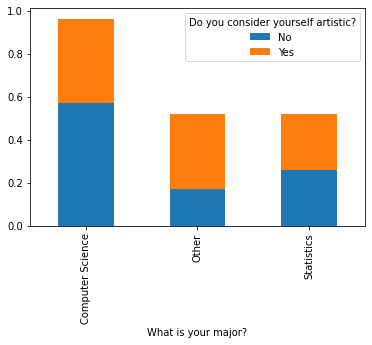

In [21]:
joint_major_artistic = pd.crosstab(df_responses["What is your major?"], df_responses["Do you consider yourself artistic?"], normalize=True);
givenArtistic = joint_major_artistic.sum(axis=0);
major_given_artistic = joint_major_artistic.divide(givenArtistic, axis=1);
major_given_artistic.plot.bar(stacked=True);
major_given_artistic


Given a student is not artistic, then there is a higher chance that they are a Computer Science major than any other major. If a student is artistic, then it is more likely that a student is a Other major than if they were not artistic. Being artistic or not has a very small noticible effect on if they are a Statistics major.